<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [3]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [5]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [28]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [29]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(melb_df, "Price", iqr_factor)

display(len(df_main_inliers) / len(melb_df))

0.9846833578792342

In [30]:
cols = df_main_inliers[df_main_inliers == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1021
Landsize        1937
BuildingArea      16
dtype: int64

In [32]:
Bedroom2 = df_main_inliers.Bedroom2
Rooms = df_main_inliers.Rooms
pandas.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3535,160,19,1,0,0,0,0
3.0,2,73,5604,172,15,1,0,0,0
4.0,0,8,70,2371,32,4,0,1,0
5.0,0,1,5,15,478,1,2,0,0
6.0,0,0,0,0,2,56,0,2,0
7.0,0,0,0,0,1,1,7,0,0
8.0,0,0,0,0,1,0,0,4,0


Se observa que la variable Bedrom2 no aporta mas información que la variable Rooms además de tener datos faltantes. Por esto se decide sacar la variable completa.

In [41]:
df_main_inliers_copy=df_main_inliers.copy()
df_main_inliers_copy=df_main_inliers_copy.drop(['Bedroom2'], axis=1)
df_main_inliers_copy.sample(10,random_state=123)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,metodo
8930,Reservoir,16 Muriel Ct,3,h,825000.0,S,RW,1/07/2017,12.0,3073.0,...,5.0,537.0,NaN,NaN,Darebin,-37.70047,145.02881,Northern Metropolitan,21650.0,Propiedad vendida
3350,Ivanhoe,9/88 Marshall St,2,u,480000.0,VB,Miles,3/09/2016,7.9,3079.0,...,1.0,0.0,NaN,NaN,Banyule,-37.77000,145.04720,Eastern Metropolitan,5549.0,Oferta del proveedor
9907,Hampton,1 Grout St,3,h,1325000.0,VB,RT,24/06/2017,13.8,3188.0,...,2.0,400.0,NaN,NaN,Unavailable,-37.93434,145.00816,Southern Metropolitan,5454.0,Oferta del proveedor
4913,Preston,16 Opal St,2,h,600000.0,S,Nelson,10/09/2016,8.8,3072.0,...,2.0,220.0,106.0,2005.0,Darebin,-37.74420,145.01680,Northern Metropolitan,14577.0,Propiedad vendida
2670,Footscray,8 Jerrold St,2,h,752000.0,SP,Jas,7/05/2016,6.4,3011.0,...,0.0,215.0,98.0,1910.0,Maribyrnong,-37.79220,144.89100,Western Metropolitan,7570.0,Propiedad vendida antes
2107,Collingwood,182 Keele St,2,h,670000.0,S,Jellis,18/03/2017,1.6,3066.0,...,0.0,118.0,NaN,NaN,Yarra,-37.79760,144.99300,Northern Metropolitan,4553.0,Propiedad vendida
2361,Essendon,65 Napier St,3,h,1467000.0,S,Greg,7/11/2016,8.0,3040.0,...,2.0,188.0,171.0,1900.0,Moonee Valley,-37.75320,144.91780,Western Metropolitan,9264.0,Propiedad vendida
2109,Collingwood,5/22 Stanley St,2,u,515000.0,S,Peter,18/03/2017,1.6,3066.0,...,1.0,816.0,NaN,NaN,Yarra,-37.80200,144.98480,Northern Metropolitan,4553.0,Propiedad vendida
1971,Coburg,9 Vincent St,4,h,1155000.0,S,Nelson,18/03/2017,7.8,3058.0,...,2.0,370.0,NaN,NaN,Moreland,-37.74310,144.95600,Northern Metropolitan,11204.0,Propiedad vendida
2640,Flemington,12/132 Princes St,2,u,556000.0,S,Woodards,16/07/2016,4.4,3031.0,...,1.0,0.0,79.0,2009.0,Moonee Valley,-37.78400,144.93560,Northern Metropolitan,3593.0,Propiedad vendida


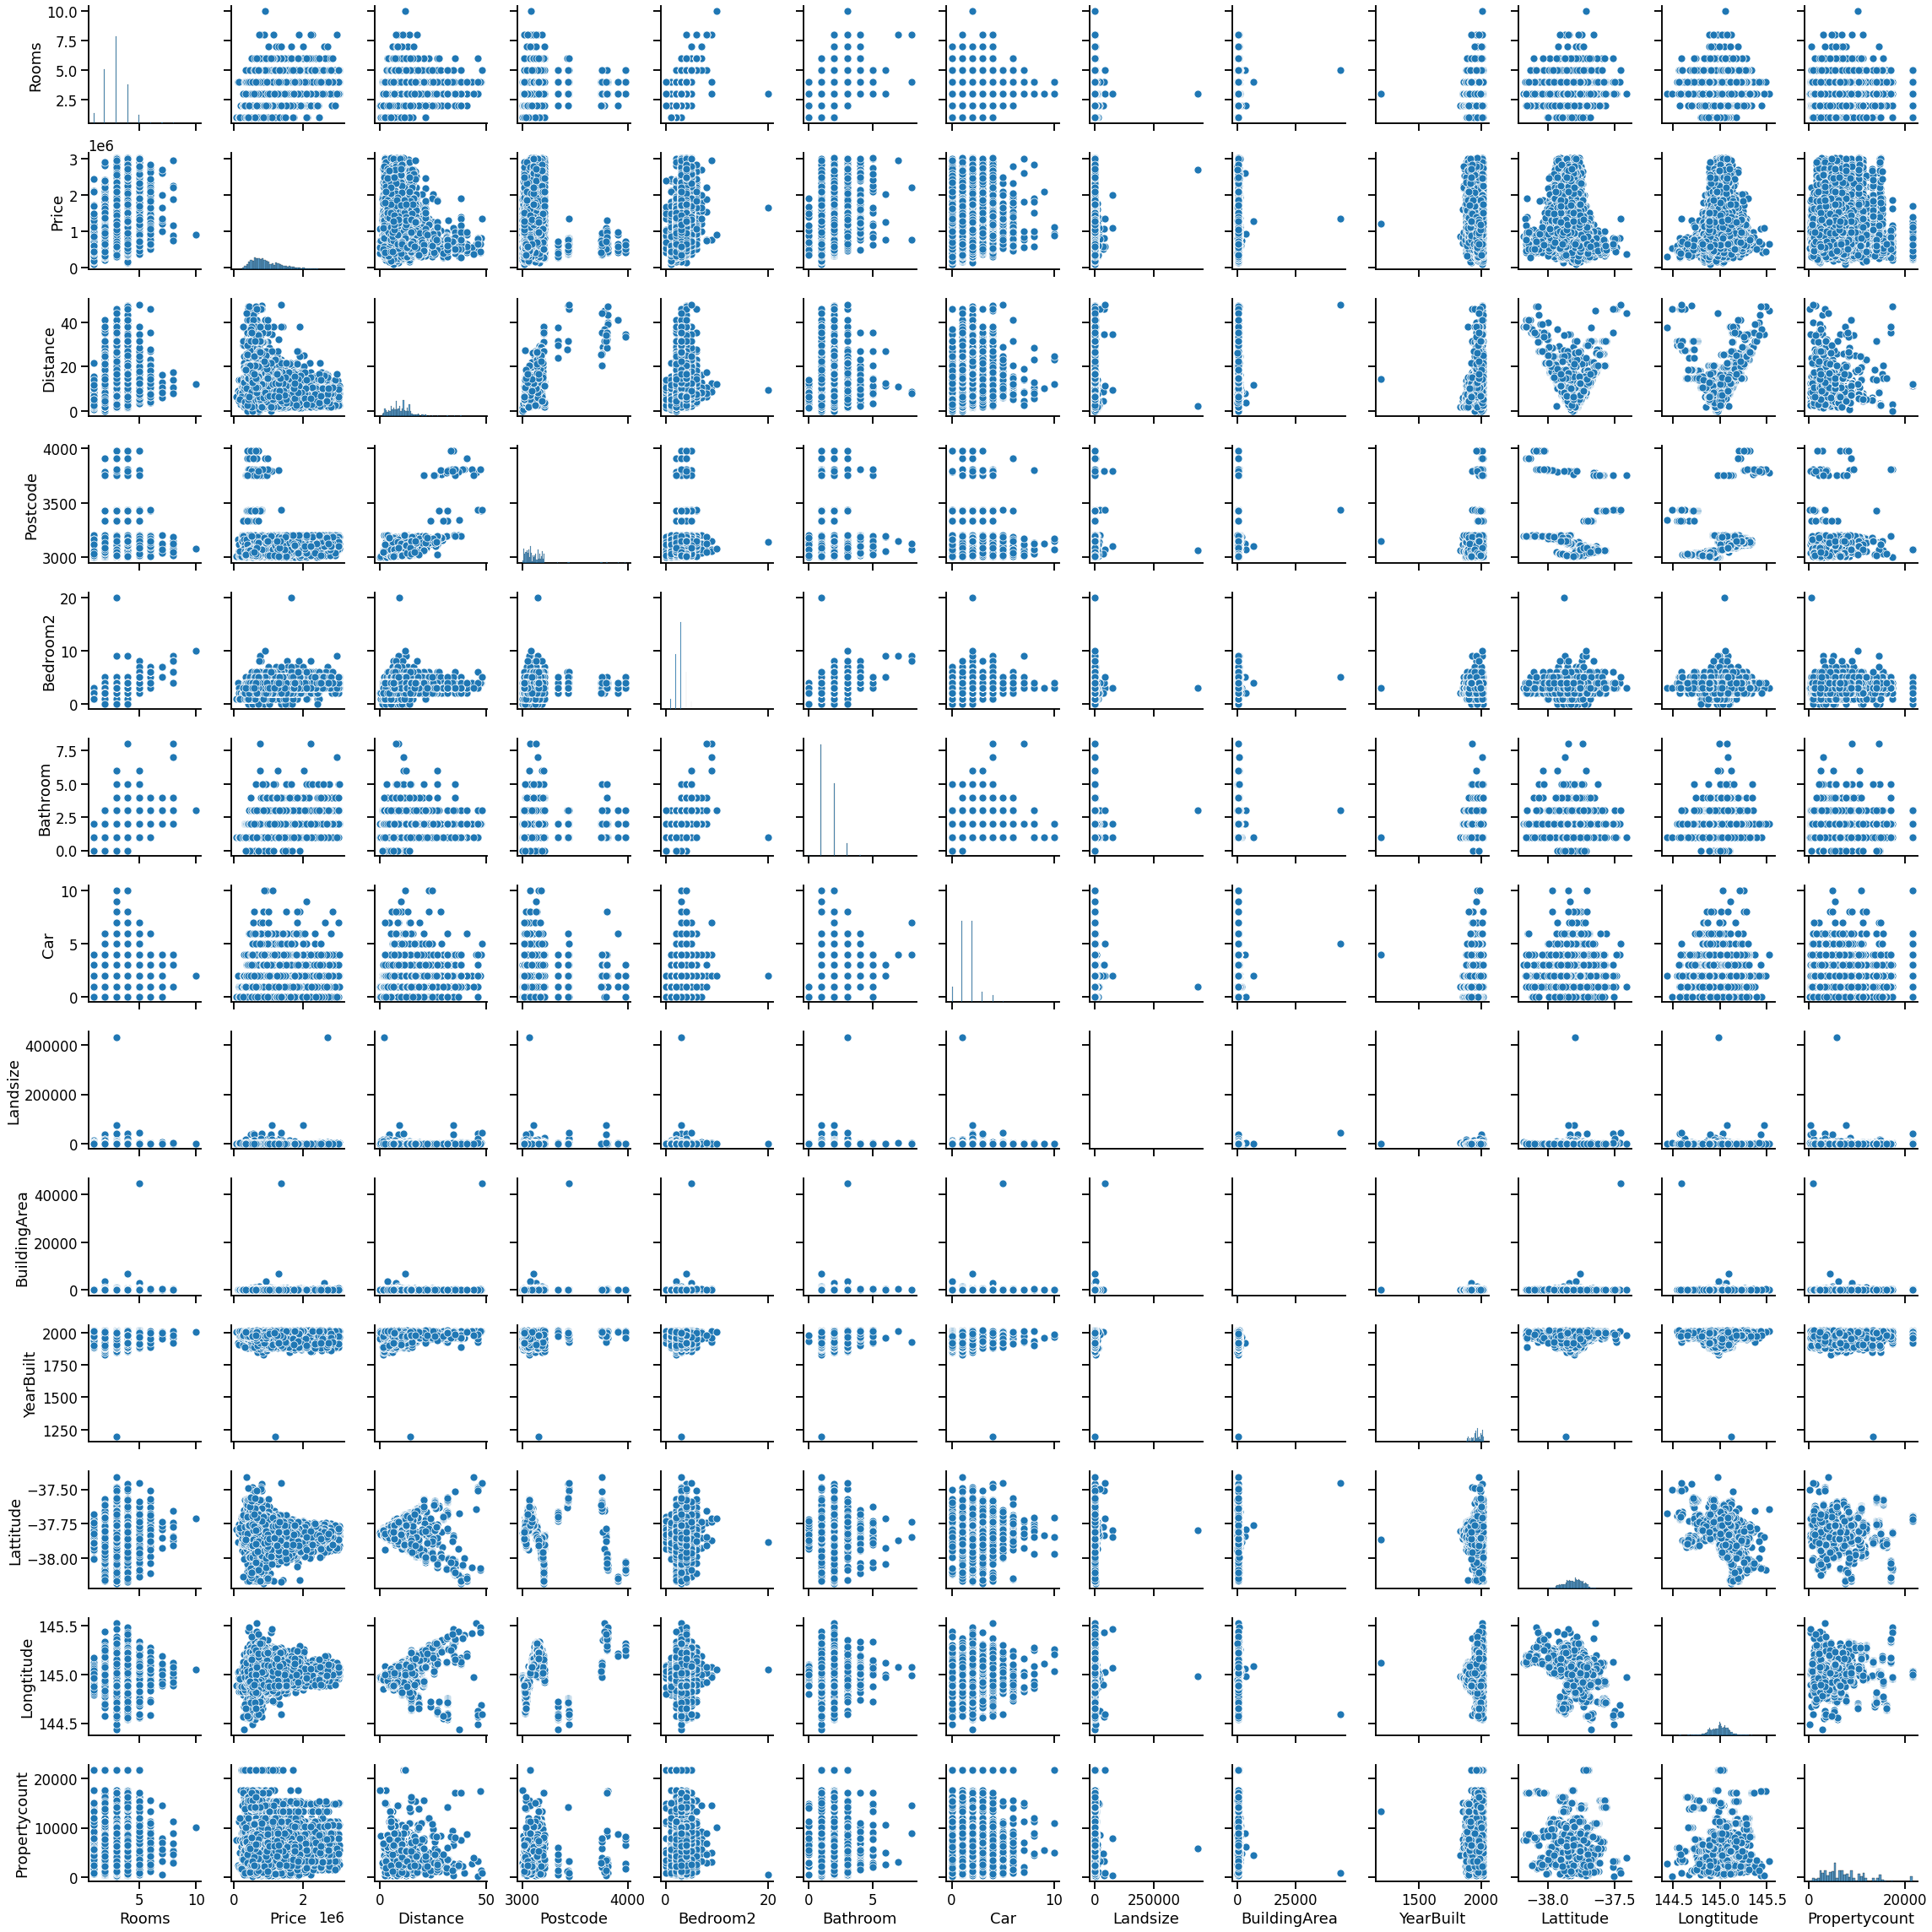

In [43]:
seaborn.pairplot(
    df_main_inliers
)

In [37]:
df_filtrado = melb_df[['Rooms','Type','Price','Method','SellerG','Date','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']]
df_filtrado

,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN
1,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0
3,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN
4,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0
13576,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0
13577,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0
13578,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0


In [27]:
df_filtrado.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000


In [7]:
melb_df.Type.unique()

array(['h', 'u', 't'], dtype=object)

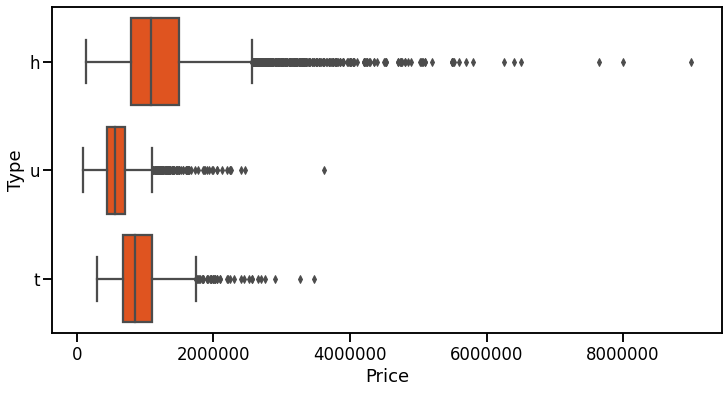

In [8]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=melb_df[['Type','Price']], x='Price', y='Type',color='orangered')
plt.ticklabel_format(style='plain', axis='x')

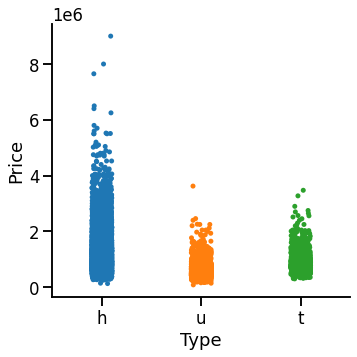

In [13]:
seaborn.catplot(x='Type',y='Price',data=melb_df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

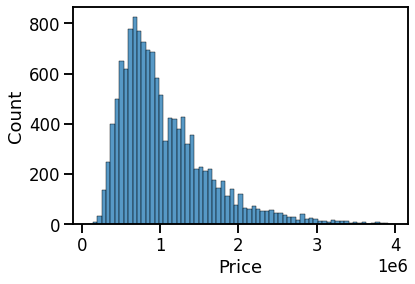

In [8]:
seaborn.histplot(data=melb_df.query("Price < 4000000"), x="Price")

In [6]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [15]:
melb_df.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [19]:
melb_df['metodo'] = melb_df.Method.replace(
    {
        'S':'Propiedad vendida',
        'SP':'Propiedad vendida antes',
        'PI':'Propiedad pasada en',
        'VB':'Oferta del proveedor',
        'SA':'vendido después de la subasta',
    })
melb_df['metodo']

0              Propiedad vendida
1              Propiedad vendida
2        Propiedad vendida antes
3            Propiedad pasada en
4           Oferta del proveedor
                  ...           
13575          Propiedad vendida
13576    Propiedad vendida antes
13577          Propiedad vendida
13578        Propiedad pasada en
13579    Propiedad vendida antes
Name: metodo, Length: 13580, dtype: object

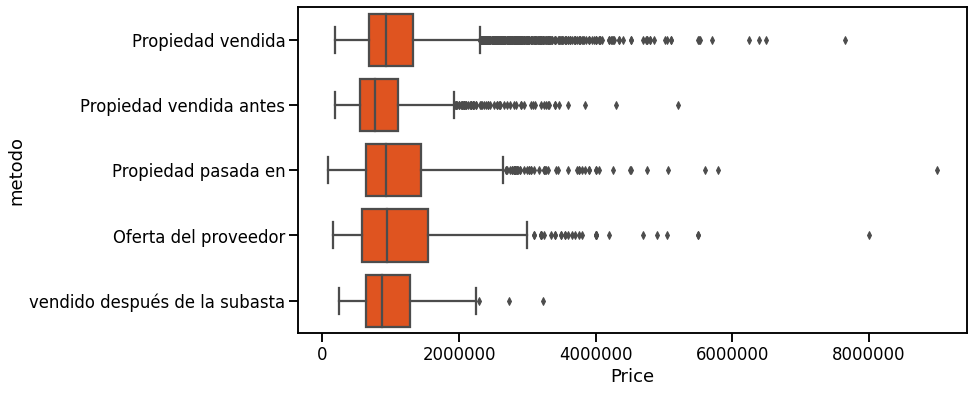

In [20]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=melb_df[['metodo','Price']], x='Price', y='metodo',color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Method:
    #S - property sold;
    #SP - property sold prior;
    #PI - property passed in;
    #PN - sold prior not disclosed;
    #SN - sold not disclosed;
    #NB - no bid;
    #VB - vendor bid;
    #W - withdrawn prior to auction;
    #SA - sold after auction;
    #SS - sold after auction price not disclosed.
    #N/A - price or highest bid not available.

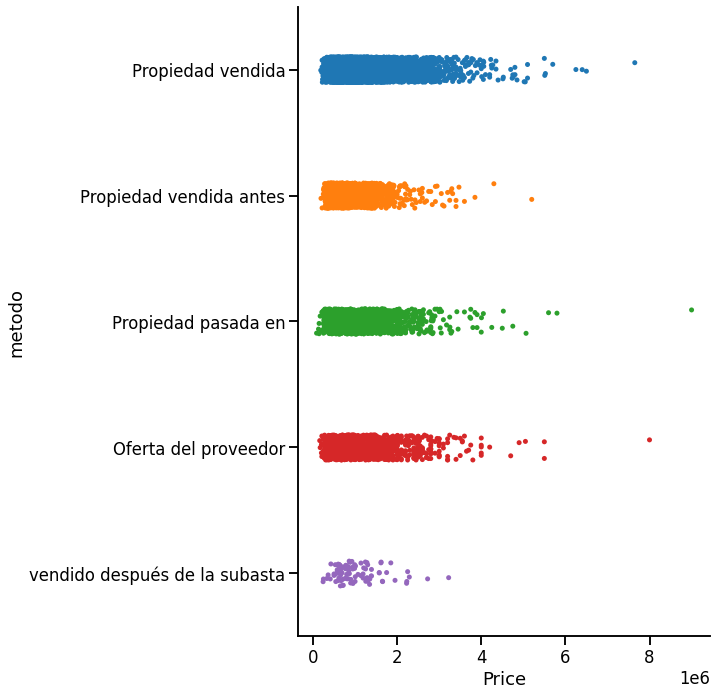

In [23]:
seaborn.catplot(x='Price',y='metodo',data=melb_df,height=10)

In [ ]:
seaborn.scatterplot(data=melb_df, x =salary_col_neto, y=salary_col_bruto)

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.